# Challenge Questions - Matplotlib

# Instructions:
• Please ensure you don't overwrite any existing cells. Add new cells below by pressing ALT+ENTER

• Attempt all of the questions

• You are encouraged to look online for help should you need it

## Run the data preparation steps below. We will be creating three DataFrames:
## • 'tfl' contains the following columns
* **'Day'**
* **'Number of Bicycle Hires'**
* **'Cumulative (m)'**: This is the running total in millions
* **'Day of Week'**: This is the Day of the week name
* **'Month'**: This is the Month name

## • 'tfl_day' is an aggregated DataFrame and contains the following columns
* **'Day of Week'**: This is the Day of the week name
* **'Day Number'**: Weekday as a decimal number
* **'Number of Bicycle Hires (millions)'**

## • 'tfl_month' is an aggregated DataFrame and contains the following columns
* **'Month'**: This is the Month
* **'Month Number'**
* **'Number of Bicycle Hires (millions)'**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
tfl = pd.read_csv(r"C:\Users\SAGAVERM\Desktop\Python Study\13 Challenge Section - Matplotlib\tfl-daily-cycle-hires.csv")

In [4]:
tfl.drop(columns='Unnamed: 2', axis=1, inplace=True)

In [5]:
tfl['Day'] = pd.to_datetime(tfl['Day'],format='%d/%m/%Y')

In [6]:
tfl['Cumulative (m)'] = tfl['Number of Bicycle Hires'].expanding().sum()/10000000

In [7]:
tfl['Day of week'] = tfl['Day'].dt.strftime('%A')
tfl['Month'] = tfl['Day'].dt.strftime('%B')
tfl['Day Number'] = tfl['Day'].dt.strftime('%w')
tfl['Month Number'] = tfl['Day'].dt.strftime('%m')

In [8]:
tfl_Day = tfl[['Day of week', 'Day Number','Number of Bicycle Hires']].groupby(by=['Day of week','Day Number']).sum()

In [9]:
tfl_Day.reset_index(inplace=True)

In [10]:
tfl_Day['Number of Bicycle Hires (millions)'] = round(tfl_Day['Number of Bicycle Hires']/1000000,2)

In [11]:
tfl_Day.drop(columns='Number of Bicycle Hires', axis=1, inplace=True)

In [12]:
tfl_Day.sort_values(['Day Number'], ascending=True, inplace=True)

In [13]:
tfl_Day

,Day of week,Day Number,Number of Bicycle Hires (millions)
3,Sunday,0,13.01
1,Monday,1,15.21
5,Tuesday,2,16.38
6,Wednesday,3,16.43
4,Thursday,4,16.37
0,Friday,5,15.79
2,Saturday,6,13.99


In [14]:
tfl_month = tfl[['Month','Month Number','Number of Bicycle Hires']].groupby(by=['Month','Month Number']).sum()

In [15]:
tfl_month.reset_index(inplace=True)

In [16]:
tfl_month.sort_values('Month Number', ascending=True, inplace=True)

In [17]:
tfl_month.reset_index(inplace=True)

In [18]:
tfl_month['Number of Bicycle Hires (millions)'] = round(tfl_month['Number of Bicycle Hires']/1000000,2)

In [19]:
tfl_month.drop(columns='Number of Bicycle Hires', axis=1, inplace=True)

In [22]:
tfl_month

,Month,Month Number,Number of Bicycle Hires (millions)
0,January,01,6.22
1,February,02,6.11
2,March,03,7.52
3,April,04,8.56
4,May,05,10.36
5,June,06,10.99
6,July,07,12.12
7,August,08,11.68
8,September,09,11.22
9,October,10,9.17


In [26]:
tfl.head(2)

,Day,Number of Bicycle Hires,Cumulative (m),Day of week,Month
0,2010-07-30,6897.0,0.000690,Friday,July
1,2010-07-31,5564.0,0.001246,Saturday,July


# 

# Challenge Exercises:

## Create a bar plot using the tfl_day DataFrame 
* It should have a figuresize of (20,5)
* It should plot 'Day of Week' on the x-axis and 'Number of Bicycle Hires (millions)' for the height
* Title the Chart 'Total Bike Hires by Day of Week', fontsize 30
* y-label should be 'Bike Hires (m)', fontsize 20
* xticks and yticks should have a fontsize of 15


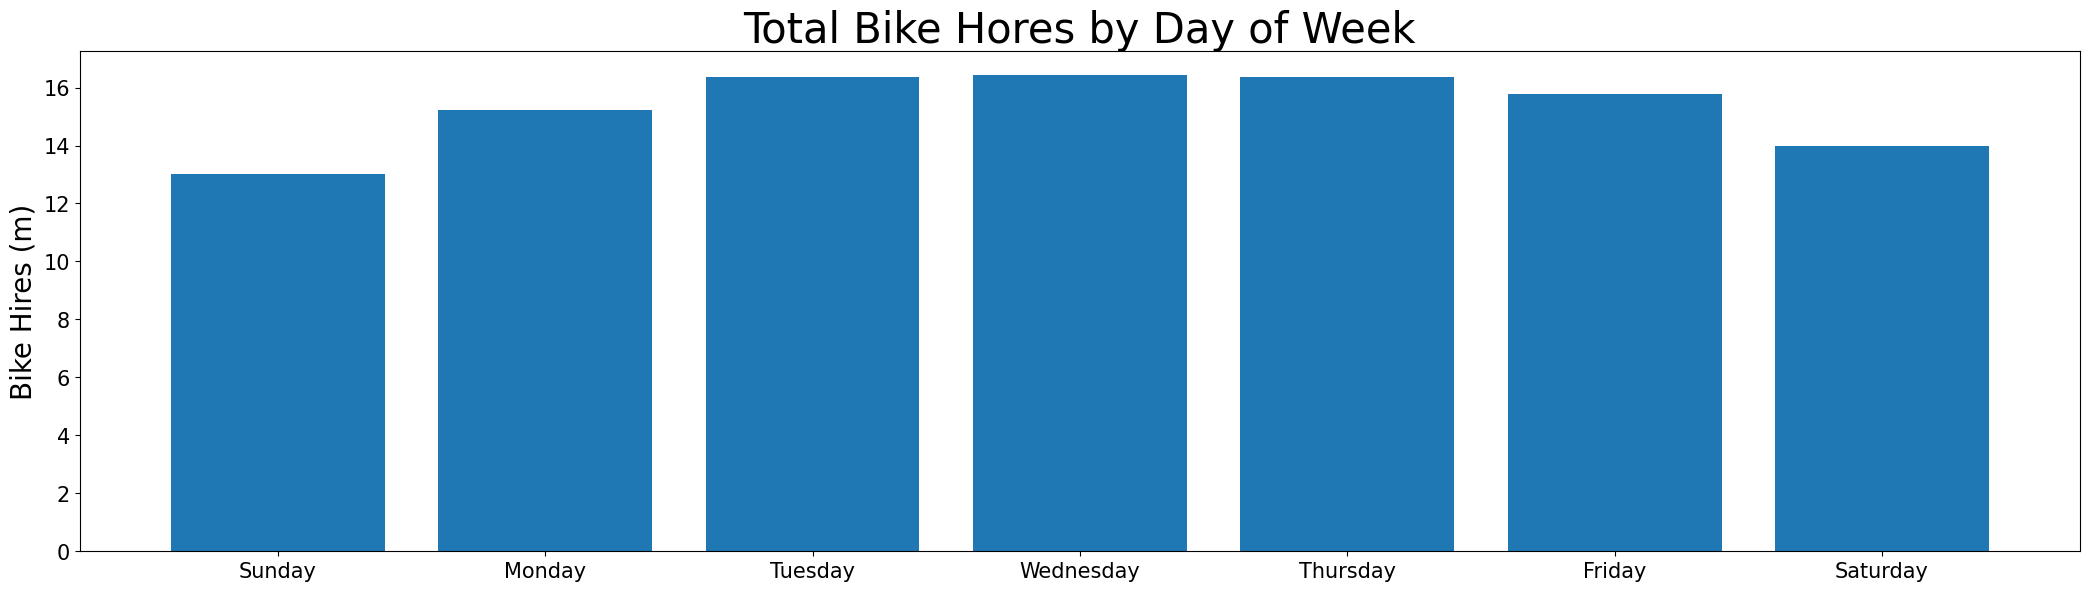

In [32]:
#plot
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title('Total Bike Hores by Day of Week', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
axes.bar(x=tfl_Day['Day of week'], height=tfl_Day['Number of Bicycle Hires (millions)'])
plt.show()

## Copy the code for the previous bar plot in the cell below and add the following color codes with a black edgecolor:
* Sunday: #6867AC
* Monday: #A267AC
* Tuesday: #CE7BB0
* Wednesday: #FFBCD1
* Thursday: #BAABDA
* Friday: #D3DEDC
* Saturday: #FFFDDE

Hint: You can pass the colors in as a list in the order specified

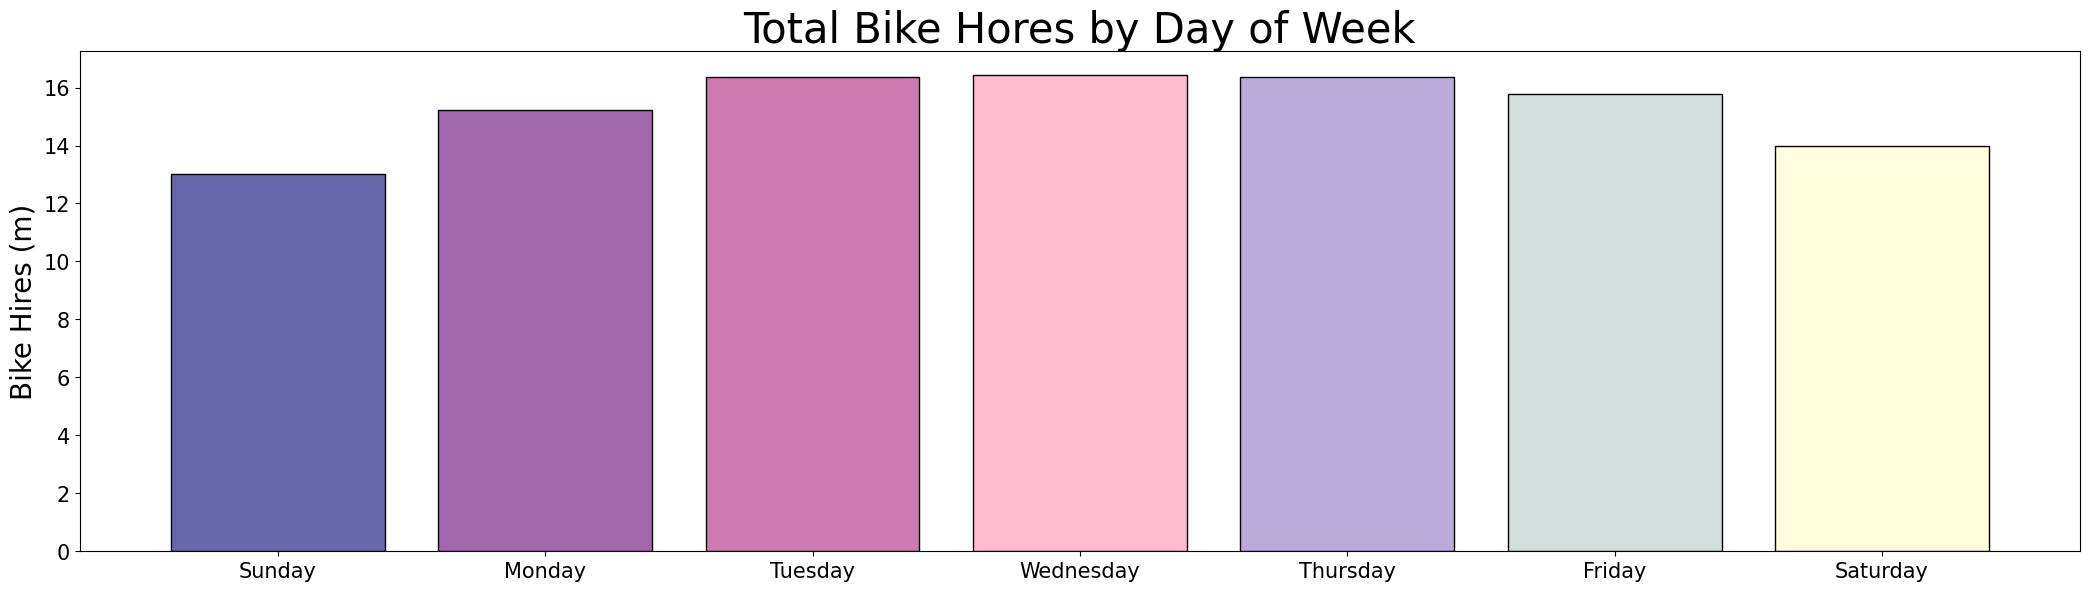

In [33]:
#plot
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title('Total Bike Hores by Day of Week', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
axes.bar(x=tfl_Day['Day of week'], height=tfl_Day['Number of Bicycle Hires (millions)'], color=['#6967AC','#A267AC','#CE7BB0','#FFBCD1','#BAABDA','#D3DEDC','#FFFDDE'], edgecolor='black')
plt.show()

## Create a bar plot using the tfl_month DataFrame 
* It should have a figuresize of (20,5)
* It should plot 'Month' on the x-axis and 'Number of Bicycle Hires' for the height
* Title the Chart 'Total Bike Hires by Month', fontsize 30
* y-label should be 'Bike Hires (m)', fontsize 20
* xticks and yticks should have a fontsize of 15

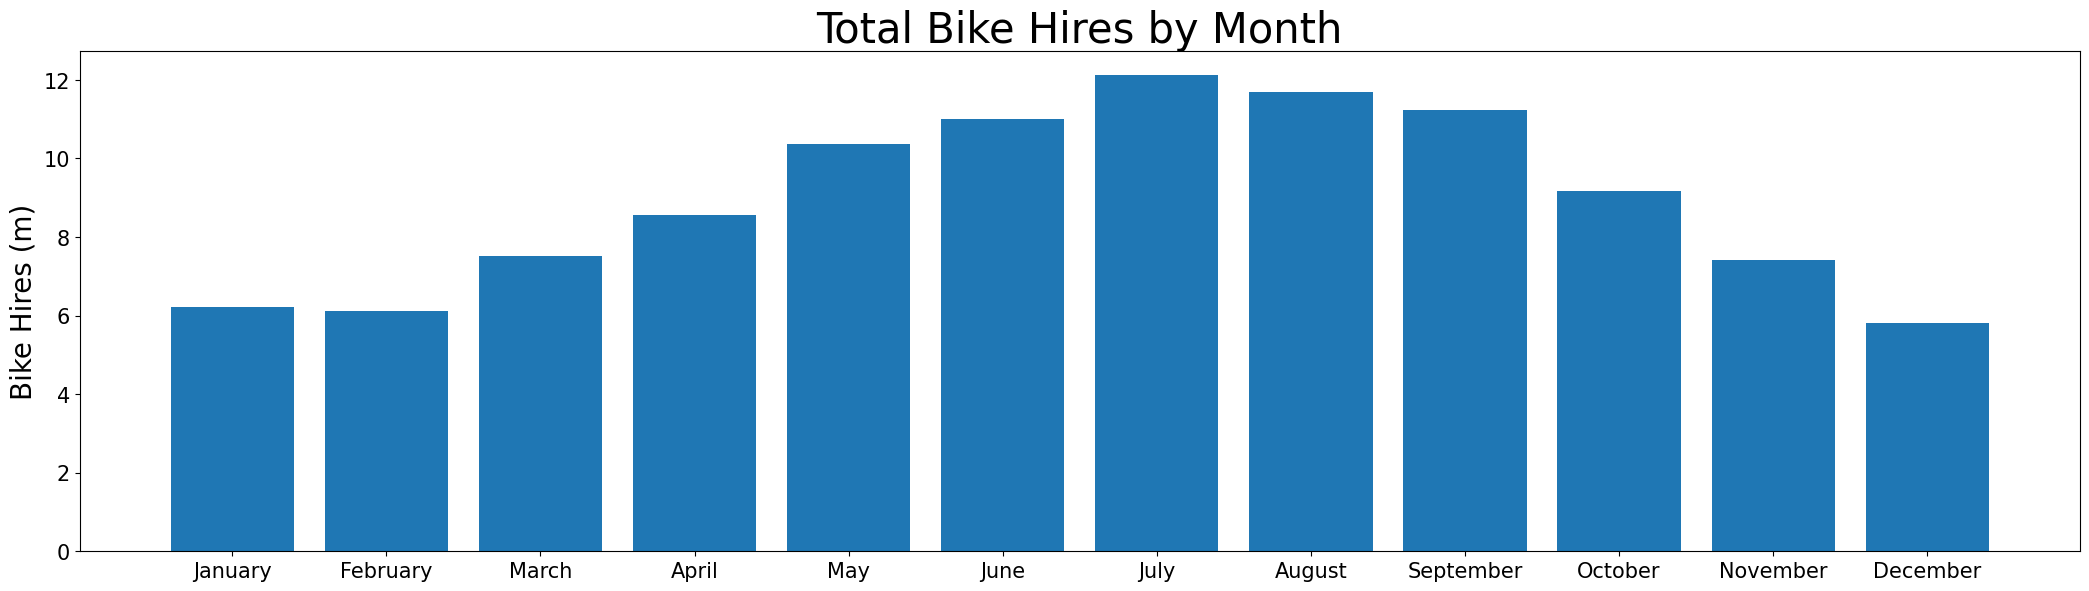

In [35]:
#plot
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title('Total Bike Hires by Month', fontsize=30)
axes.set_ylabel('Bike Hires (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
axes.bar(x=tfl_month['Month'], height=tfl_month['Number of Bicycle Hires (millions)'])
plt.show()

## Using the tfl DataFrame create a chart with a secondary y-axis:
* It should have a figuresize of (20,10)
* 'Day' on the x-axis
* 'Number of Bicycle Hires' on the left (main) y-axis as a Bar Plot, color '#CE7BB0'
* 'Cumulative' on the right (secondary) y-axis as a Line Plot, color '#6867AC'
* Title the Chart 'TfL Bike Hires (Combo Chart)', fontsize 30
* The left y-axis label should be 'Daily Number of Bicycle Hires', fontsize 20
* The right y-axis label should be 'Cumulative Total (millions)', fontsize 20
* The x-axis label should be 'Date', fontsize 20

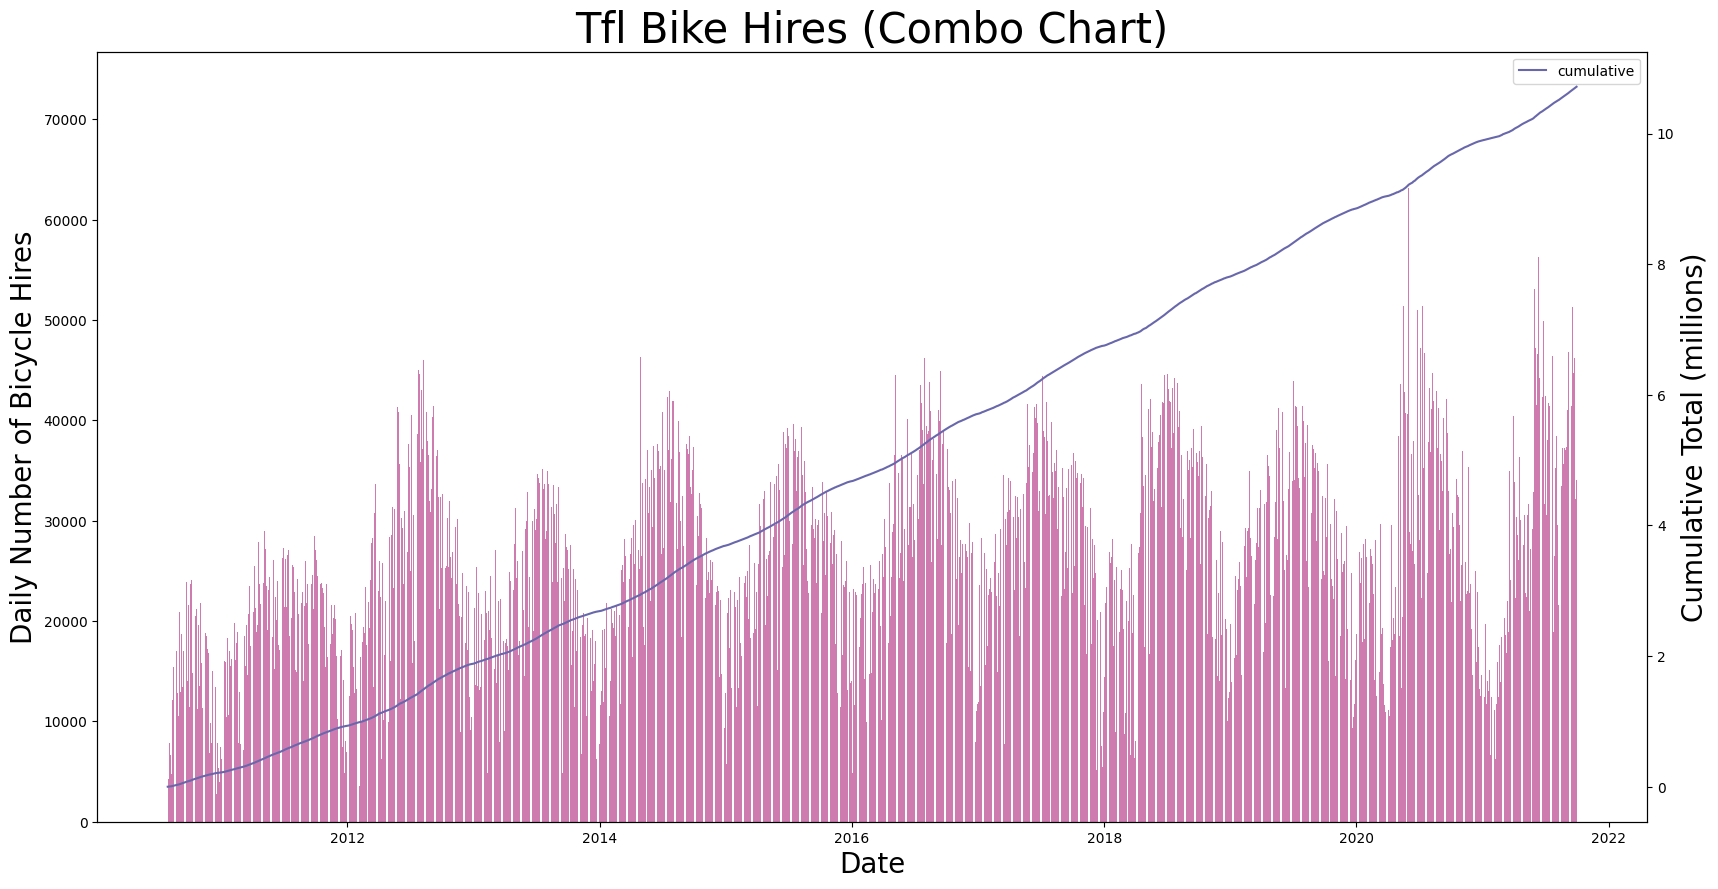

In [41]:
#plot
fig ,ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax1.set_title('Tfl Bike Hires (Combo Chart)', fontsize=30)
ax1.set_ylabel('Daily Number of Bicycle Hires', fontsize=20)
ax2.set_ylabel('Cumulative Total (millions)', fontsize=20)
ax1.set_xlabel('Date', fontsize=20)
ax1.bar(x=tfl['Day'], height=tfl['Number of Bicycle Hires'], color='#CE7BB0')
ax2.plot(tfl['Day'],tfl['Cumulative (m)'], color='#6867AC', label='cumulative')
plt.legend()
plt.show()


## Create a Plot Area Consisting of 3 axes
* Two of the axes should be side by side and have a figure size of (5,4)
* One axis should be in the bottom and have a figure size of (12,4)

## Plot the following Charts using the tfl DataFrame:
### On the top left axes plot a box plot
* 'Number of Bicycle Hires' on the x-axis and label of 'Number of Bicycle Hires (millions)'
* Do not include outliers

### On the top right axes plot a histogram
* 'Number of Bicycle Hires' on the x-axis
* binsize of 30

### On the bottom axes plot a line chart
* 'Day' on the x-axis
* 'Number of Bicycle Hires' on the y-axis

Format the chart however you like and add appropriate titles, x-axis labels and y-axis labels.

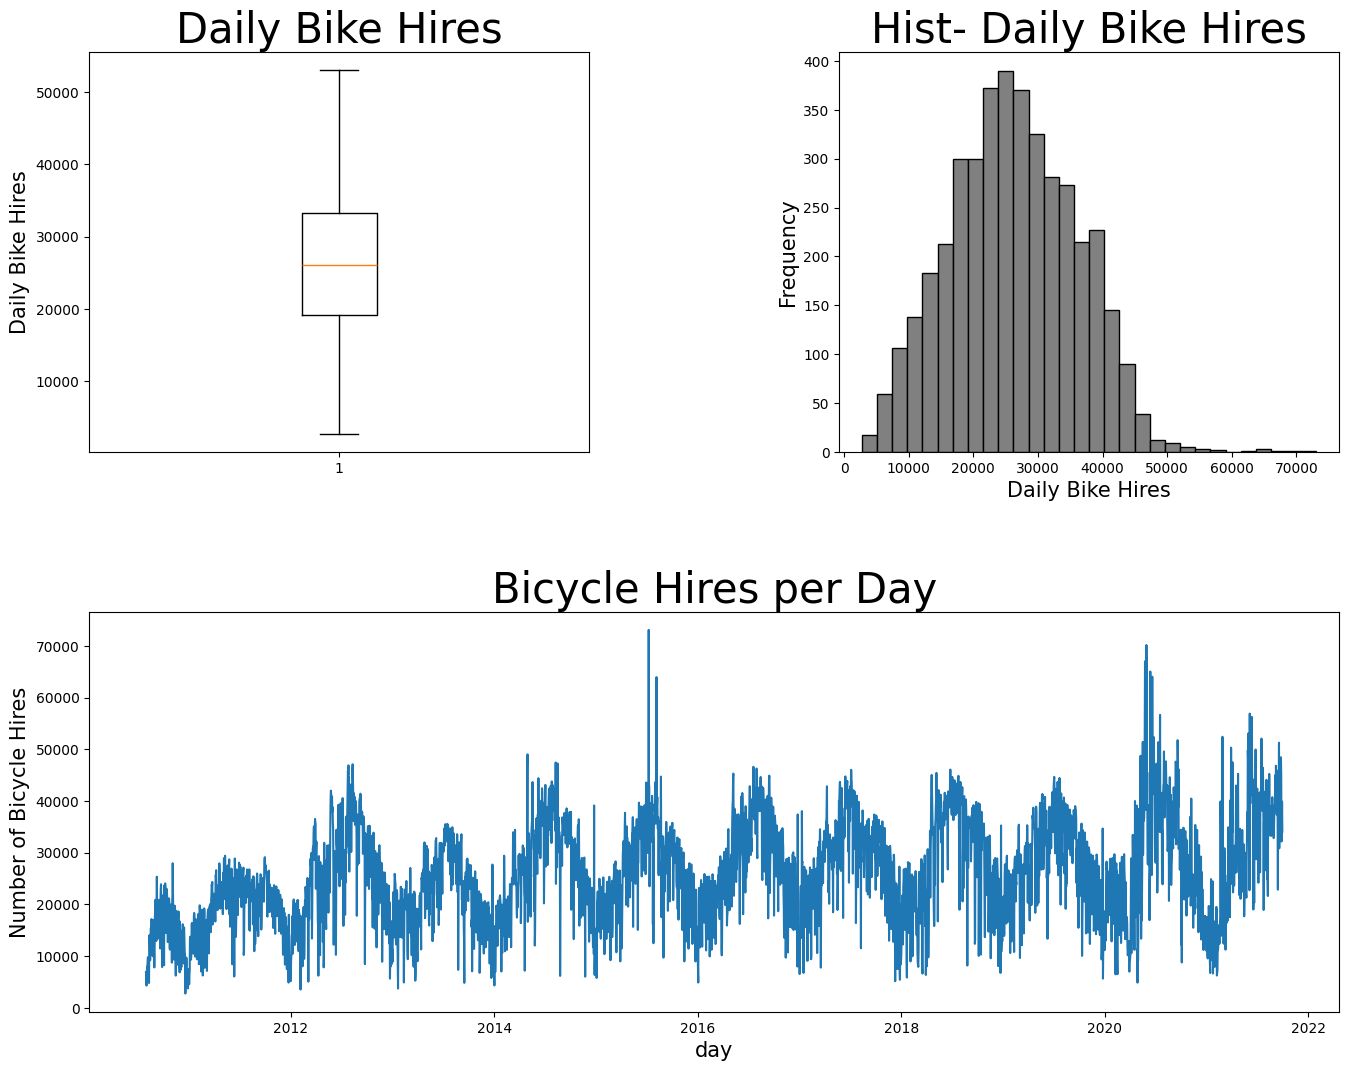

In [48]:
#plot
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1.5,0,1,1])
ax3 = fig.add_axes([0,-1.4,2.5,1])
#ax1
ax1.boxplot(x=tfl['Number of Bicycle Hires'], showfliers=False)
ax1.set_title('Daily Bike Hires', fontsize=30)
ax1.set_ylabel('Daily Bike Hires', fontsize=15)
#ax2
ax2.hist(x=tfl['Number of Bicycle Hires'], bins=30, edgecolor='black', color='grey')
ax2.set_title('Hist- Daily Bike Hires', fontsize=30)
ax2.set_ylabel('Frequency', fontsize=15)
ax2.set_xlabel('Daily Bike Hires', fontsize=15)
#ax3
ax3.plot(tfl['Day'],tfl['Number of Bicycle Hires'])
ax3.set_title('Bicycle Hires per Day', fontsize=30)
ax3.set_ylabel('Number of Bicycle Hires', fontsize=15)
ax3.set_xlabel('day', fontsize=15)
plt.show()

## Create a Plot Area Consisting of 2 axes (2 rows and 1 column) using the Subplots method
* The Plot Area should have a figuresize of (15,10) and a tight_layout

## Plot the following Bar Charts:
### On the top axes plot a bar chart using the tfl_month DataFrame
* 'Month' on the x-axis with a label of 'Month'
* 'Number of Bicycle Hires (millions)' on the y-axis with a label of 'Bike Hires (m)'

### On the bottom axes plot a bar chart using the tfl_day DataFrame
* 'Day of Week' on the x-axis with a label of 'Day of Week'
* 'Number of Bicycle Hires (millions)' on the y-axis with a label of 'Bike Hires (m)'


* Format both charts however you like

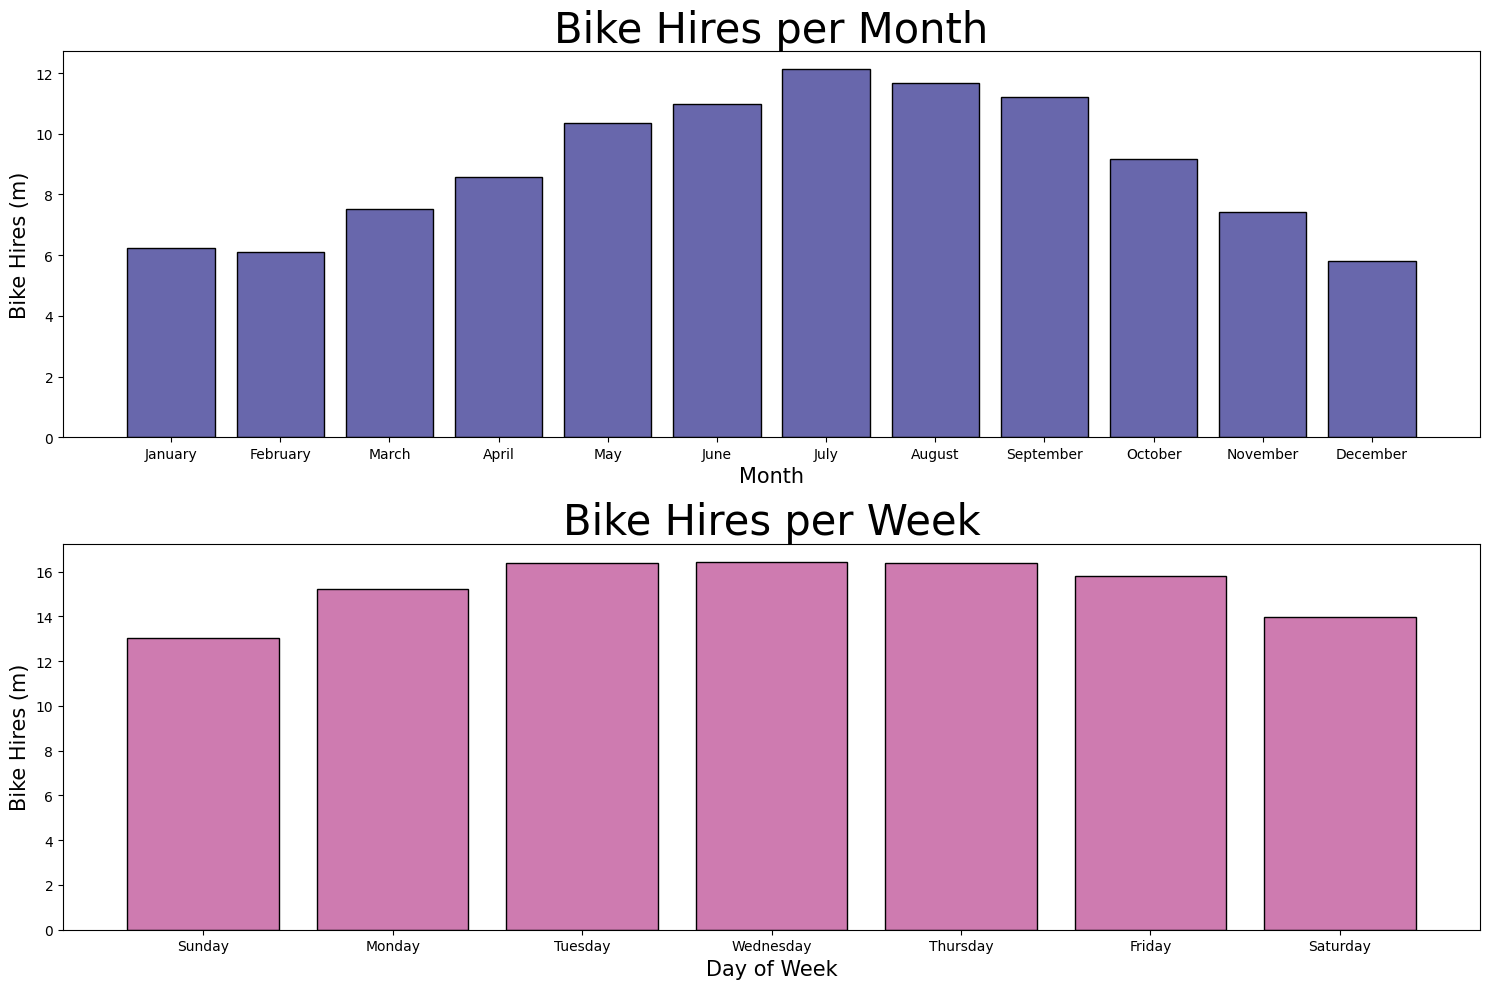

In [57]:
#plot
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
ax1.bar(x=tfl_month['Month'], height=tfl_month['Number of Bicycle Hires (millions)'],edgecolor='black',color='#6867AC')
#ax1
ax1.set_title('Bike Hires per Month', fontsize=30)
ax1.set_ylabel('Bike Hires (m)', fontsize=15)
ax1.set_xlabel('Month', fontsize=15)
#ax2
ax2.bar(x=tfl_Day['Day of week'], height=tfl_Day['Number of Bicycle Hires (millions)'], edgecolor='black', color ='#CE7BB0')
ax2.set_title('Bike Hires per Week', fontsize=30)
ax2.set_ylabel('Bike Hires (m)', fontsize=15)
ax2.set_xlabel('Day of Week', fontsize=15)
plt.tight_layout()
plt.show()